# auto_price

In [2]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

## Data Description

### Load csv file

In [2]:
df = pd.read_csv("auto_price.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18286 entries, 0 to 18285
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           18286 non-null  int64  
 1   Make_Model           16092 non-null  object 
 2   Body_Type            16092 non-null  object 
 3   Price                14995 non-null  object 
 4   Vat                  11886 non-null  object 
 5   Mileage              16641 non-null  object 
 6   Type                 14446 non-null  object 
 7   Fuel                 11155 non-null  object 
 8   Gears                13166 non-null  float64
 9   Comfort_Convenience  14081 non-null  object 
 10  Entertainment_Media  8595 non-null   object 
 11  Extras               2743 non-null   object 
 12  Safety_Security      5121 non-null   object 
 13  Age                  17006 non-null  float64
 14  Previous_Owners      9875 non-null   float64
 15  Horsepower           17006 non-null 

### Data Description Detail

In [3]:
# Check the number of properties and instances
n_instances , n_attributes = df.shape
print(f"The number of instance : {n_instances}")
print(f"The number of attribute : {n_attributes}")

The number of instance : 18286
The number of attribute : 24


In [4]:
# The overall proportion of missing values
rate = df.isna().sum()
total =0
for item in rate:
    total+=item
result = ((total/n_attributes)/n_instances)*100
print(result)

31.33157424623574


In [5]:
# Check the data type of each attribute, the proportion of missing values, and the unique values in the categorical features.
df_unique_value_column = [c for c in df.columns if df[c].dtype == "object"]
df_unique_values = df[df_unique_value_column].nunique()

df_summary = pd.DataFrame({
    "non_null": df.notna().sum(),
    "missing": df.isna().sum(),
    "missing_value_rate(%)":((df.isna().sum()/len(df))*100).round(1),
    "unique_values_in_cat":df_unique_values,
    "dtype": df.dtypes
}).reindex(df.columns) 
df_summary

,non_null,missing,missing_value_rate(%),unique_values_in_cat,dtype
Unnamed: 0,18286,0,0.0,NaN,int64
Make_Model,16092,2194,12.0,9.0,object
Body_Type,16092,2194,12.0,8.0,object
Price,14995,3291,18.0,4541.0,object
Vat,11886,6400,35.0,2.0,object
Mileage,16641,1645,9.0,7507.0,object
Type,14446,3840,21.0,5.0,object
Fuel,11155,7131,39.0,4.0,object
Gears,13166,5120,28.0,NaN,float64
Comfort_Convenience,14081,4205,23.0,5289.0,object


## Data Cleaning and Processing

#### Data Prerocessing - Count the number of distinct units in Price, Mileage, Horsepower, Displacement, and Weight

In [6]:
"""Identify the specific situation where the original type that should have been an integer includes all the different units."""
non_null_prices = df["Price"].dropna()
currency_count = non_null_prices.str[0].value_counts().to_dict()
print("Price Unit statistics：",currency_count)

mileage_units = df["Mileage"].dropna().astype(str)
mi_count = mileage_units.str.contains('mi|miles', case=False, na=False).sum()
km_count = mileage_units.str.contains('km|kilometers', case=False, na=False).sum()
unknown_count = len(mileage_units) - mi_count - km_count
unit_count = {'mi': mi_count, 'km': km_count, 'unknown': unknown_count}
print("Mileage Unit statistics:", unit_count)

hp_units = df["Horsepower"].dropna().astype(str)
hp_unit_count = hp_units.str.extract(r'([a-zA-Z]+)')[0].value_counts().to_dict()
print("Horsepower Unit statistics:", hp_unit_count)


disp_units = df["Displacement"].dropna().astype(str)
disp_unit_count = disp_units.str.extract(r'([a-zA-Z]+)')[0].value_counts().to_dict()
print("Displacement Unit statistics:", disp_unit_count)

weight_units = df["Weight"].dropna().astype(str)
weight_unit_count = weight_units.str.extract(r'([a-zA-Z]+)')[0].value_counts().to_dict()
print("Weight Unit statistics:", weight_unit_count)

Price Unit statistics： {'$': 8111, '€': 4806, '£': 2078}
Mileage Unit statistics: {'mi': 7813, 'km': 8828, 'unknown': 0}
Horsepower Unit statistics: {'kW': 17006}
Displacement Unit statistics: {'cc': 13349}
Weight Unit statistics: {'kg': 9097, 'lbs': 4829, 'g': 2349}


In [7]:
import numpy as np
import re

In [8]:
"""Function for checking negative values"""
def detect_negative_value(att_name):
    att_raw = df[att_name].astype(str)
    att_val = pd.to_numeric(att_raw.str.replace(r"[^\d\.\-]", "", regex=True), errors="coerce")
    negative_val = df.loc[att_val < 0, [att_name]]
    print(negative_val)

In [9]:
'''Check for the negative values of the following attributes'''
detect_negative_value("Price")
detect_negative_value("Mileage")
detect_negative_value("Horsepower")
detect_negative_value("Displacement")
detect_negative_value("Weight")

                      Price
5555   $-197271.94210085942
7060   $-142101.19042530045
8298    $-142201.3283743091
10634           £-111787.26
15364  $-147720.12694777024
                     Mileage
3426           -406274.90 mi
9928   -582983.2883414491 km
10275   -582612.067557342 km
13100  -548427.5511934992 km
                   Horsepower
3201    -540.2810353120354 kW
5797    -529.9351443872027 kW
6732   -362.92366073306397 kW
17242   -529.9351443872027 kW
                Displacement
15742  -4826.332613436321 cc
17415  -4826.332613436321 cc
                      Weight
2922           -3847330.79 g
3288  -2975.2683049258267 kg
5214  -4013.8920708045007 kg
8059  -3531.1278614125813 kg
8647   -1858.539936118876 kg
9866            -5828.01 lbs


#### Data Processing and cleaning

In [10]:

"""First, convert these into the correct types, while retaining the outliers and negative values."""
"""=================================================================="""
"""Fixed Exchange Rate Mapping (Approximate Values)"""
currency_rates = {
    "$": 1.0,  
    "€": 1.1,   
    "£": 1.27   
}
def parse_price_to_usd(price_str):
    """Convert Price with currency symbol to USD, keep negatives if present"""
    if pd.isna(price_str):
        return np.nan
    s = str(price_str)
    # Identify Currency
    symbol = None
    for sym in currency_rates.keys():
        if sym in s:
            symbol = sym
            break
    # Extract number (allow negative)
    nums = re.findall(r"-?[\d\.,]+", s)
    if not nums:
        return np.nan
    num = nums[0].replace(",", "")
    try:
        val = float(num)
    except:
        return np.nan
    # Convert to US dollars
    if symbol in currency_rates:
        usd_val = val * currency_rates[symbol]
    else:
        usd_val = np.nan
    return round(usd_val, 1)

df["price_USD"] = df["Price"].map(parse_price_to_usd)

"""=================================================================="""
def convert_mileage_to_km(value):
    if pd.isna(value):
        return np.nan
    s = str(value).lower().replace(" ", "")
    nums = re.findall(r"-?[\d\.,]+", s)
    if not nums:
        return np.nan
    num = nums[0].replace(",", "")
    try:
        val = float(num)
    except:
        return np.nan
    if "mi" in s:
        return round(val * 1.60934, 1)
    else:
        return round(val, 1)
df["Mileage_KM"] = df["Mileage"].map(convert_mileage_to_km)
"""=================================================================="""
def convert_weight_to_kg(value):
    """Convert the 'Weight' attribute uniformly to kilograms, keep negatives if present"""
    if pd.isna(value):
        return np.nan
    s = str(value).lower().replace(" ", "")
    nums = re.findall(r"-?[\d\.,]+", s)  
    if not nums:
        return np.nan
    num = nums[0].replace(",", "")
    try:
        val = float(num)
    except:
        return np.nan
    if "lbs" in s or "lb" in s:
        return round(val * 0.45359237, 1)
    elif "g" in s and "kg" not in s:
        return round(val / 1000.0, 1)
    else:
        return round(val, 1)

df["Weight_KG"] = df["Weight"].map(convert_weight_to_kg)
"""=================================================================="""
def convert_displacement_to_l(value):
    """Convert the 'Displacement' attribute uniformly to liters, keep negatives if present"""
    if pd.isna(value):
        return np.nan
    s = str(value).lower().replace(" ", "")
    nums = re.findall(r"-?[\d\.,]+", s)  
    if not nums:
        return np.nan
    num = nums[0].replace(",", "")
    try:
        val = float(num)
    except:
        return np.nan
    if "cc" in s or "cm3" in s or "cm³" in s:
        return round(val / 1000.0, 1)
    elif "l" in s:
        return round(val, 1)
    else:  # 没写单位时默认 cc
        return round(val / 1000.0, 1)

df["Displacement_L"] = df["Displacement"].map(convert_displacement_to_l)
"""=================================================================="""
def convert_horsepower_to_float(value):
    """Convert the 'Horsepower' field to float (kW), keep negatives if present"""
    if pd.isna(value):
        return np.nan
    s = str(value).lower().replace(" ", "")
    nums = re.findall(r"-?[\d\.,]+", s)  
    if not nums:
        return np.nan
    num = nums[0].replace(",", "")
    try:
        val = float(num)
    except:
        return np.nan
    return round(val, 1)

df["Horsepower_KW"] = df["Horsepower"].map(convert_horsepower_to_float)
"""=================================================================="""
def detect_all_positive_number(att_name):
    all_positive_integers = (
        df[att_name].dropna().apply(lambda x: x >= 0 and float(x).is_integer())
    ).all()
    print("all positive?：", all_positive_integers)

In [11]:
detect_negative_value("price_USD")
detect_negative_value("Mileage_KM")
detect_negative_value("Weight_KG")
detect_negative_value("Displacement_L")
detect_negative_value("Horsepower_KW")

       price_USD
5555   -197271.9
7060   -142101.2
8298   -142201.3
10634  -141969.8
15364  -147720.1
       Mileage_KM
3426    -653834.4
9928    -582983.3
10275   -582612.1
13100   -548427.6
      Weight_KG
2922    -3847.3
3288    -2975.3
5214    -4013.9
8059    -3531.1
8647    -1858.5
9866    -2643.5
       Displacement_L
15742            -4.8
17415            -4.8
       Horsepower_KW
3201          -540.3
5797          -529.9
6732          -362.9
17242         -529.9


In [12]:
"""Fill the negative values with the NAN type."""
df.loc[df["price_USD"] < 0, "price_USD"] = np.nan
df.loc[df["Mileage_KM"] < 0, "Mileage_KM"] = np.nan
df.loc[df["Weight_KG"] < 0, "Weight_KG"] = np.nan
df.loc[df["Displacement_L"] < 0, "Displacement_L"] = np.nan
df.loc[df["Horsepower_KW"] < 0, "Horsepower_KW"] = np.nan

In [13]:
detect_negative_value("price_USD")
detect_negative_value("Mileage_KM")
detect_negative_value("Weight_KG")
detect_negative_value("Displacement_L")
detect_negative_value("Horsepower_KW")

Empty DataFrame
Columns: [price_USD]
Index: []
Empty DataFrame
Columns: [Mileage_KM]
Index: []
Empty DataFrame
Columns: [Weight_KG]
Index: []
Empty DataFrame
Columns: [Displacement_L]
Index: []
Empty DataFrame
Columns: [Horsepower_KW]
Index: []


In [14]:
"""Delete the original columns that have not been cleaned and the columns with excessive missing values that are not relevant to the research topic."""
df = df.drop(columns=["Mileage", "Weight", "Displacement", "Price","Horsepower","Unnamed: 0","Extras","Safety_Security","Entertainment_Media","Upholstery_Type"])

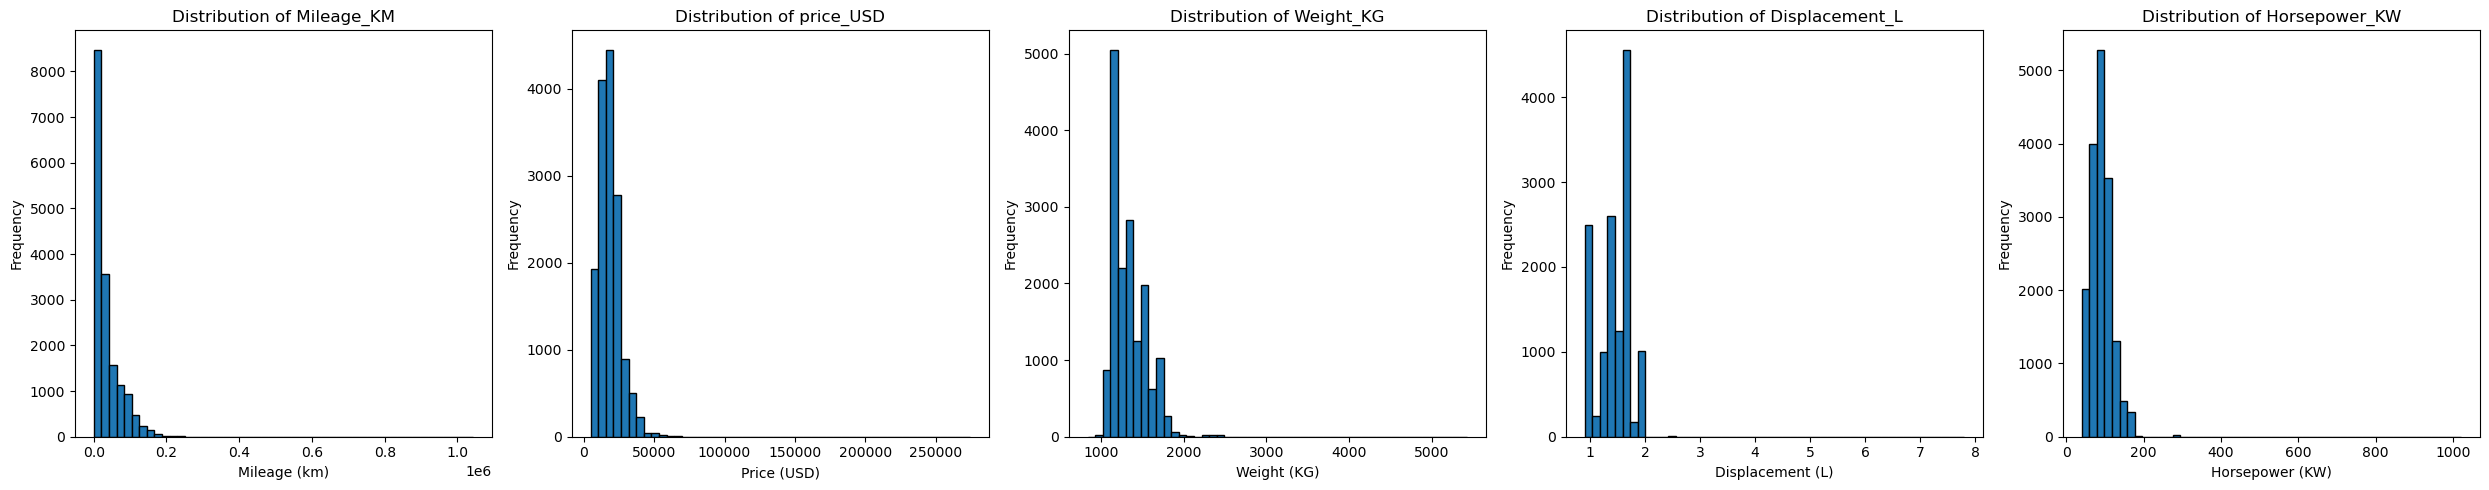

In [15]:
"""Use the histogram to view the skewness of the field"""
import matplotlib.pyplot as plt
import pandas as pd

fig, axes = plt.subplots(1, 5, figsize=(25, 5))  

axes[0].hist(df["Mileage_KM"].dropna(), bins=50, edgecolor="black")
axes[0].set_xlabel("Mileage (km)")
axes[0].set_ylabel("Frequency")
axes[0].set_title("Distribution of Mileage_KM")


axes[1].hist(df["price_USD"].dropna(), bins=50, edgecolor="black")
axes[1].set_xlabel("Price (USD)")
axes[1].set_ylabel("Frequency")
axes[1].set_title("Distribution of price_USD")


axes[2].hist(df["Weight_KG"].dropna(), bins=50, edgecolor="black")
axes[2].set_xlabel("Weight (KG)")
axes[2].set_ylabel("Frequency")
axes[2].set_title("Distribution of Weight_KG")


axes[3].hist(df["Displacement_L"].dropna(), bins=50, edgecolor="black")
axes[3].set_xlabel("Displacement (L)")
axes[3].set_ylabel("Frequency")
axes[3].set_title("Distribution of Displacement_L")


axes[4].hist(df["Horsepower_KW"].dropna(), bins=50, edgecolor="black")
axes[4].set_xlabel("Horsepower (KW)")
axes[4].set_ylabel("Frequency")
axes[4].set_title("Distribution of Horsepower_KW")

plt.tight_layout()
plt.show()

In [16]:
"""Replace NAN with the median."""
def clean_with_median(df, col):
    median_val = df[col].median(skipna=True)
    df[col] = df[col].fillna(median_val)
    return df, median_val

In [17]:
"""Implement the function that replaces NAN with the median value."""
df, median_mileage = clean_with_median(df, "price_USD")
print("Mileage_KM median:", median_mileage)
df, median_mileage = clean_with_median(df, "Mileage_KM")
print("Mileage_KM median:", median_mileage)
df, median_mileage = clean_with_median(df, "Weight_KG")
print("Mileage_KM median:", median_mileage)
df, median_mileage = clean_with_median(df, "Displacement_L")
print("Mileage_KM median:", median_mileage)
df, median_mileage = clean_with_median(df, "Horsepower_KW")
print("Mileage_KM median:", median_mileage)

Mileage_KM median: 17019.7
Mileage_KM median: 20099.9
Mileage_KM median: 1295.0
Mileage_KM median: 1.5
Mileage_KM median: 85.0


In [18]:
"""Convert the conversions that do not conform to the semantics into the corresponding types."""
df["Gears"] = df["Gears"].astype("Int64")             
df["Previous_Owners"] = df["Previous_Owners"].astype("Int64")
df["Inspection_New"] = df["Inspection_New"].astype("Int64")

In [19]:
"""Check whether the other unprocessed numerical types contain negative or unreasonable values."""
detect_negative_value("Gears")
detect_negative_value("Age")
detect_negative_value("Previous_Owners")
detect_negative_value("Inspection_New")
detect_negative_value("Cons_Comb")


Empty DataFrame
Columns: [Gears]
Index: []
Empty DataFrame
Columns: [Age]
Index: []
Empty DataFrame
Columns: [Previous_Owners]
Index: []
Empty DataFrame
Columns: [Inspection_New]
Index: []
Empty DataFrame
Columns: [Cons_Comb]
Index: []


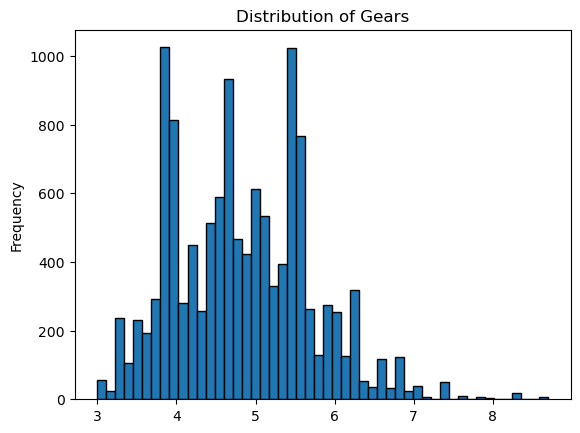

In [20]:
plt.hist(df["Cons_Comb"].dropna(), bins=50, edgecolor="black")
plt.ylabel("Frequency")
plt.title("Distribution of Gears")
plt.show()

In [21]:
import pandas as pd
import numpy as np

def fill_missing_values(df):
    """
    Fill in the missing values in the specified columns:
    - Gears → Mode
    - Age → Median
    - Previous_Owners → Mode
    - Inspection_New → Mode
    - Cons_Comb → Median 
    """
    
    if "Gears" in df.columns:
        mode_gears = df["Gears"].mode(dropna=True)[0]
        df["Gears"] = df["Gears"].fillna(mode_gears)
    
    if "Age" in df.columns:
        median_age = df["Age"].median(skipna=True)
        df["Age"] = df["Age"].fillna(median_age)
    
    if "Previous_Owners" in df.columns:
        mode_prev = df["Previous_Owners"].mode(dropna=True)[0]
        df["Previous_Owners"] = df["Previous_Owners"].fillna(mode_prev)
    
    if "Inspection_New" in df.columns:
        mode_insp = df["Inspection_New"].mode(dropna=True)[0]
        df["Inspection_New"] = df["Inspection_New"].fillna(mode_insp)
    
    if "Cons_Comb" in df.columns:
        median_cons = df["Cons_Comb"].median(skipna=True)
        df["Cons_Comb"] = df["Cons_Comb"].fillna(median_cons)
    
    return df

In [22]:
df = fill_missing_values(df)

In [23]:
def add_comfort_count(df, col="Comfort_Convenience", new_col="Comfort_Count"):
    """
    Based on the "Comfort_Convenience" column, count the quantity of each row configuration, and add a "Comfort_Count" column.
    - Missing values or 'unknown' are recorded as 0.
    - The default delimiter is a comma ','. 
    """
    df[new_col] = (
        df[col]
        .fillna("unknown")  
        .apply(lambda x: 0 if str(x).lower().strip() == "unknown" 
               else len([i.strip() for i in str(x).split(",") if i.strip()]))
    )
    return df

In [24]:
def fill_object_columns(
    df,
    missing_threshold=0.20,
    rare_count_threshold=None,
    rare_pct=0.005,
    unknown_label="Unknown",
    other_label="Other"
):
    n_rows = len(df)
    if rare_count_threshold is None:
        rare_threshold = max(2, int(n_rows * rare_pct))
    else:
        rare_threshold = max(1, int(rare_count_threshold))

    obj_cols = df.select_dtypes(include=["object"]).columns

    for col in obj_cols:
        s = df[col]
        miss_ratio = s.isna().mean()

        # 1) Missing value imputation (swapped logic)
        if miss_ratio <= missing_threshold:
            # Prefer to use mode; if no mode (all NaN etc.), fallback to unknown_label
            mode_vals = s.mode(dropna=True)
            if not mode_vals.empty:
                mode_val = mode_vals.iloc[0]
                df[col] = s.fillna(mode_val)
                print(f"{col}: missing {miss_ratio:.2%} → fill with mode '{mode_val}'")
            else:
                df[col] = s.fillna(unknown_label)
                print(f"{col}: missing {miss_ratio:.2%} (no mode) → fill with '{unknown_label}'")
        else:
            df[col] = s.fillna(unknown_label)
            print(f"{col}: missing {miss_ratio:.2%} → fill with '{unknown_label}'")

        # 2) Rare category folding (excluding unknown_label)
        vc = df[col].value_counts(dropna=False)
        # Categories to be folded (occurrence < rare_threshold and not unknown_label)
        rare_values = vc[(vc < rare_threshold)].index.tolist()
        if unknown_label in rare_values:
            rare_values.remove(unknown_label)

        if rare_values:
            df[col] = df[col].where(~df[col].isin(rare_values), other_label)
            print(
                f"{col}: folded {len(rare_values)} rare categories "
                f"(count < {rare_threshold}) into '{other_label}'"
            )
        else:
            print(f"{col}: no rare categories below {rare_threshold}")

    return df

In [25]:
# Check the data type of each attribute, the proportion of missing values, and the unique values in the categorical features.
df_unique_value_column = [c for c in df.columns if df[c].dtype == "object"]
df_unique_values = df[df_unique_value_column].nunique()

df_summary = pd.DataFrame({
    "non_null": df.notna().sum(),
    "missing": df.isna().sum(),
    "missing_value_rate(%)":((df.isna().sum()/len(df))*100).round(1),
    "unique_values_in_cat":df_unique_values,
    "dtype": df.dtypes
}).reindex(df.columns) 
df_summary

,non_null,missing,missing_value_rate(%),unique_values_in_cat,dtype
Make_Model,16092,2194,12.0,9.0,object
Body_Type,16092,2194,12.0,8.0,object
Vat,11886,6400,35.0,2.0,object
Type,14446,3840,21.0,5.0,object
Fuel,11155,7131,39.0,4.0,object
Gears,18286,0,0.0,NaN,Int64
Comfort_Convenience,14081,4205,23.0,5289.0,object
Age,18286,0,0.0,NaN,float64
Previous_Owners,18286,0,0.0,NaN,Int64
Inspection_New,18286,0,0.0,NaN,Int64


In [26]:
df = add_comfort_count(df)

print(df[[ "Comfort_Count"]].head())

   Comfort_Count
0             16
1              9
2             13
3             16
4             13


In [27]:
df = df.drop(columns=["Comfort_Convenience"])

In [28]:
import seaborn as sns
def plot_categorical_distribution(data, figurenumber: int = 1, exclude_cols=None, cols_per_row: int = 3):
    if exclude_cols is None:
        exclude_cols = []
    categorical_vars = data.select_dtypes(include=["object", "category"]).columns
    categorical_vars = [col for col in categorical_vars if col not in exclude_cols]
    
    n_vars = len(categorical_vars)
    n_rows = (n_vars + cols_per_row - 1) // cols_per_row  # calculate number of rows
    
    fig, axes = plt.subplots(n_rows, cols_per_row, figsize=(cols_per_row * 6, n_rows * 5))
    axes = axes.flatten()  # flatten into 1D for easy iteration
    
    figure_counter = 1
    for i, var in enumerate(categorical_vars):
        non_na_data = data[data[var].notna()]
        if non_na_data.empty:
            continue
        prop_counts = non_na_data[var].value_counts(normalize=True)
        sns.barplot(x=prop_counts.index, y=prop_counts.values, ax=axes[i])
        axes[i].tick_params(axis="x", rotation=45)  # rotate tick labels
        axes[i].set_title(f"Figure {figurenumber}.{figure_counter}: {var}")
        axes[i].set_xlabel("Category")
        axes[i].set_ylabel("Proportion")
        figure_counter += 1
    
    # hide extra empty subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()


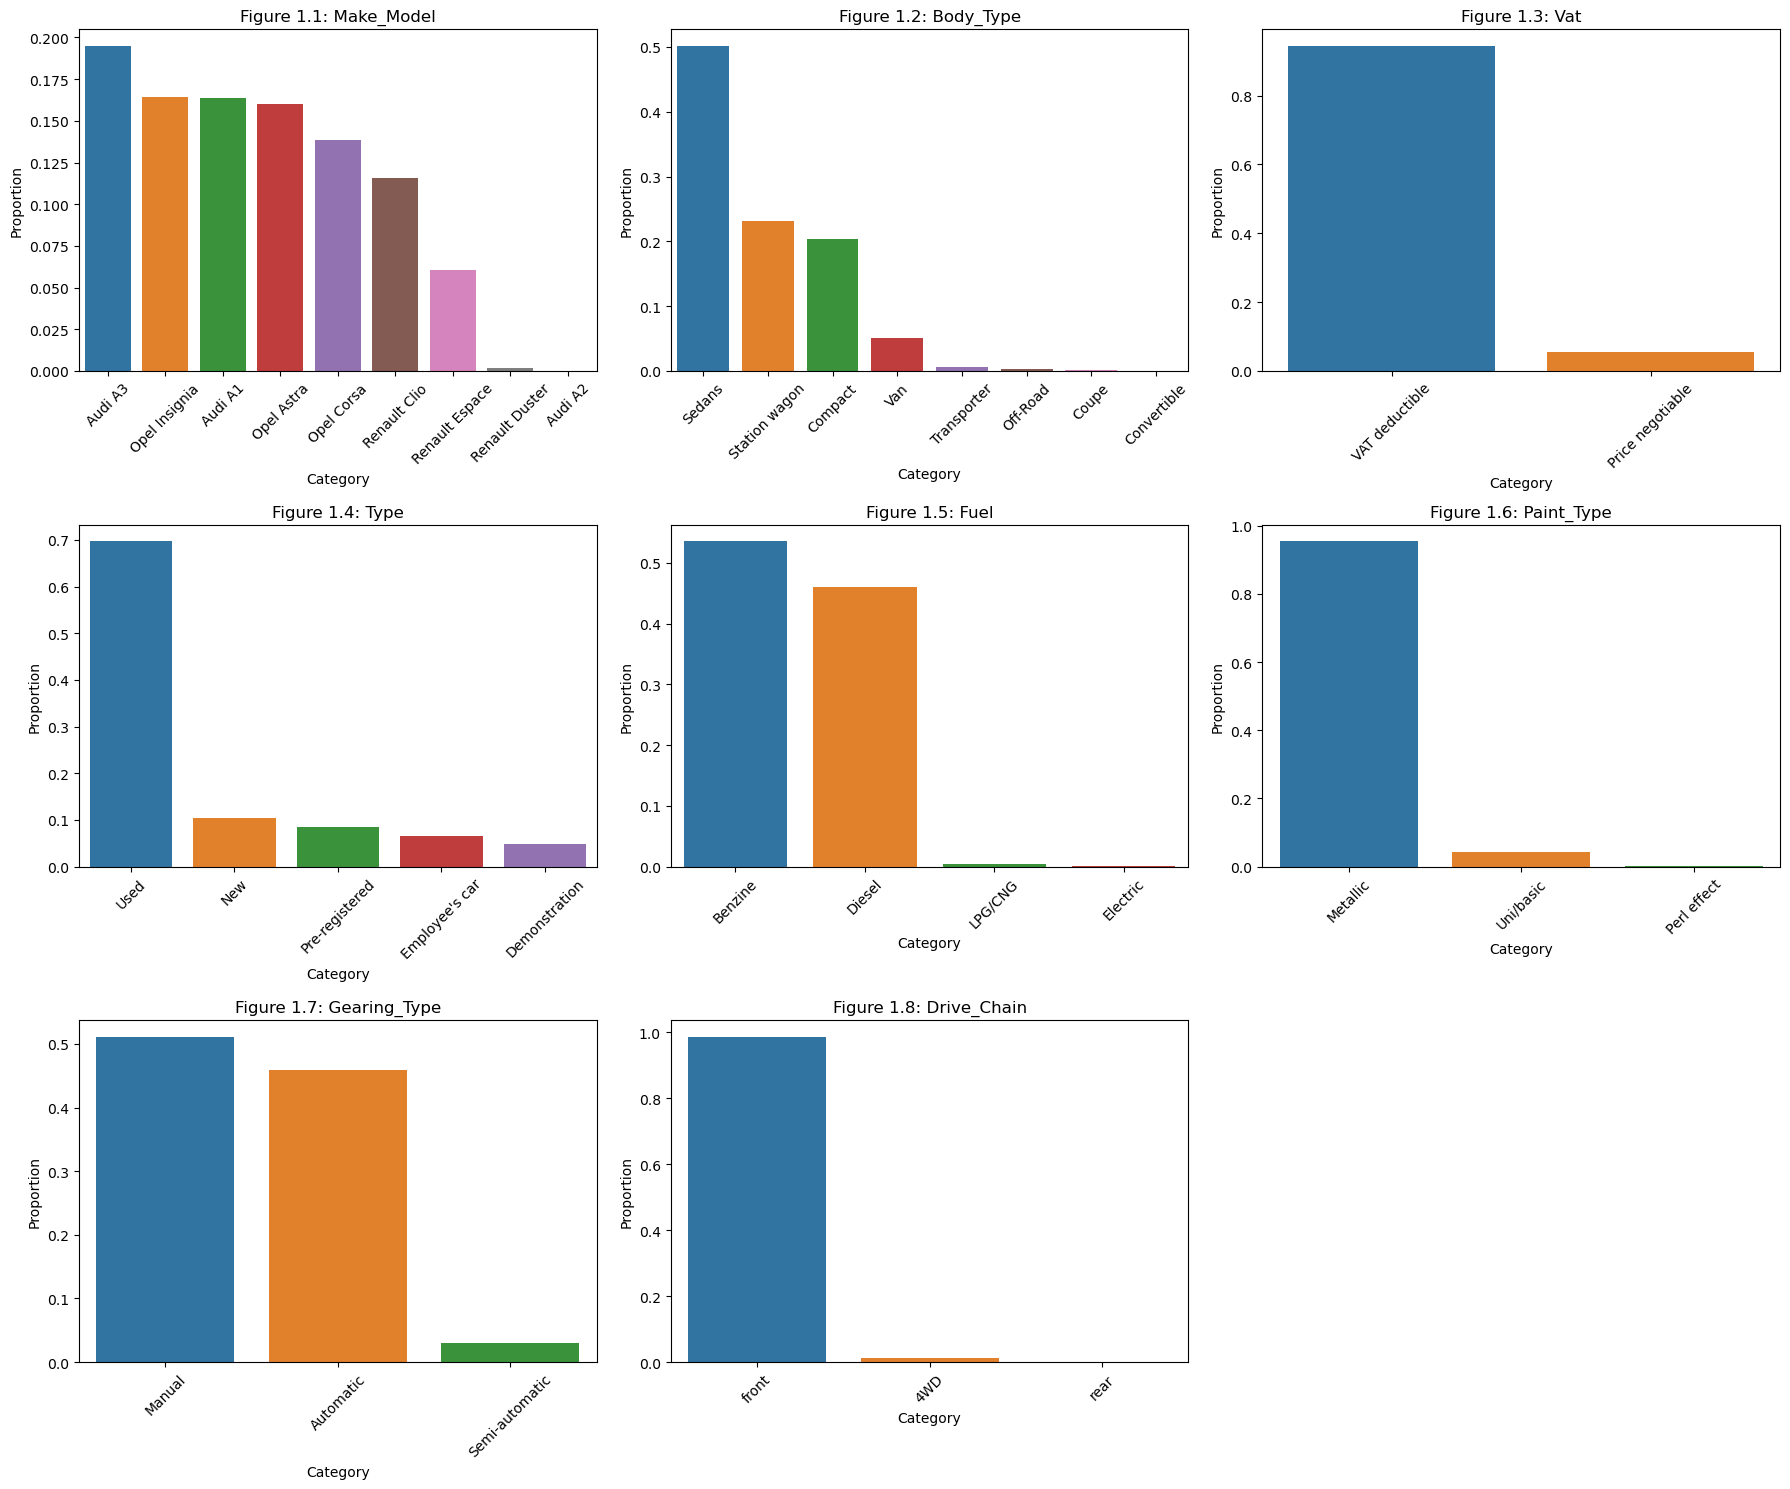

In [29]:
# See the object of result before fill in function 
plot_categorical_distribution(df)

In [30]:
df = fill_object_columns(df)

Make_Model: missing 12.00% → fill with mode 'Audi A3'
Make_Model: folded 2 rare categories (count < 91) into 'Other'
Body_Type: missing 12.00% → fill with mode 'Sedans'
Body_Type: folded 4 rare categories (count < 91) into 'Other'
Vat: missing 35.00% → fill with 'Unknown'
Vat: no rare categories below 91
Type: missing 21.00% → fill with 'Unknown'
Type: no rare categories below 91
Fuel: missing 39.00% → fill with 'Unknown'
Fuel: folded 2 rare categories (count < 91) into 'Other'
Paint_Type: missing 57.00% → fill with 'Unknown'
Paint_Type: folded 1 rare categories (count < 91) into 'Other'
Gearing_Type: missing 7.00% → fill with mode 'Manual'
Gearing_Type: no rare categories below 91
Drive_Chain: missing 33.00% → fill with 'Unknown'
Drive_Chain: folded 1 rare categories (count < 91) into 'Other'


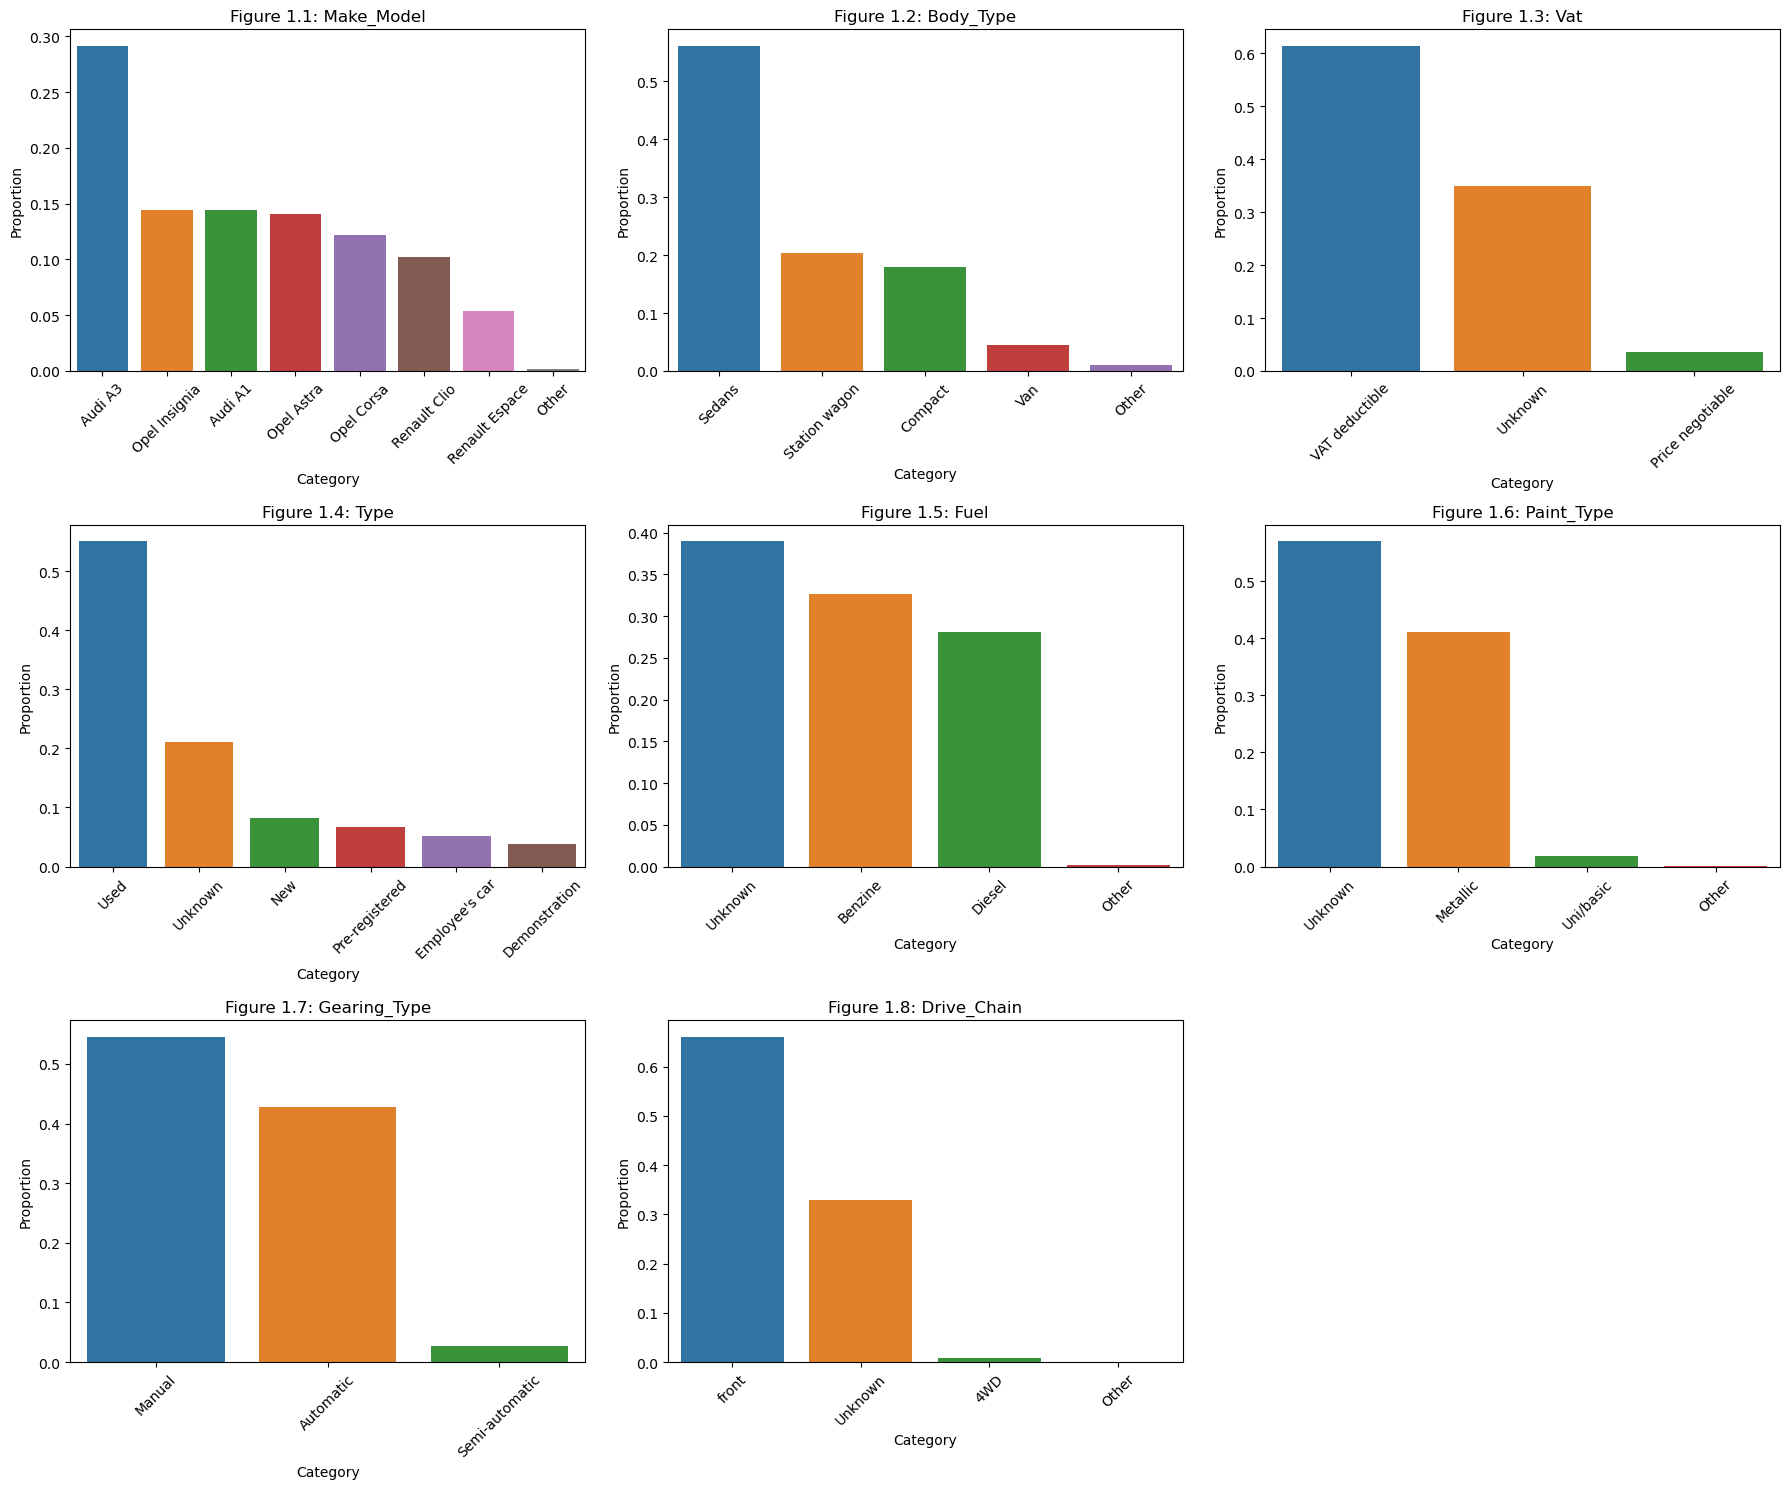

In [31]:
# See the object of result after fill in function 
plot_categorical_distribution(df)

## Exploratory Data Analysis

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Numeric correlation heat map

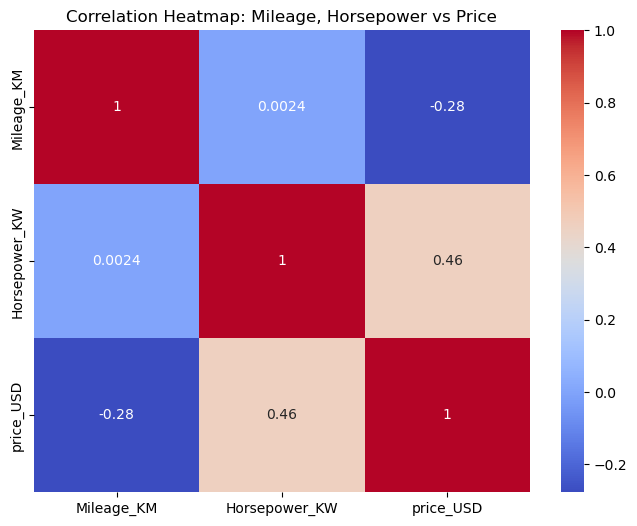

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df[["Mileage_KM", "Horsepower_KW", "price_USD"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap: Mileage, Horsepower vs Price")
plt.show()

### Numeric scatter plot: Mileage vs Price

/Users/mia/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


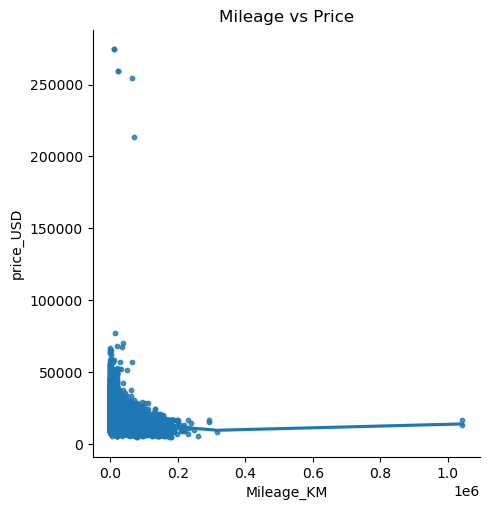

In [ ]:
sns.lmplot(x="Mileage_KM", y="price_USD", data=df, scatter_kws={"s":10}, lowess=True)
plt.title("Mileage vs Price")
plt.show()

### Numeric scatter plot: Horsepower vs Price

/Users/mia/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


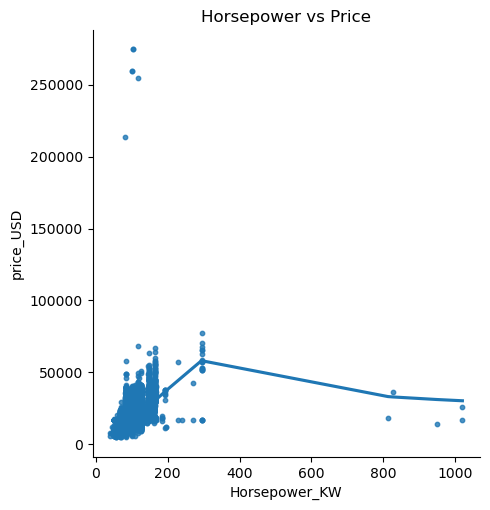

In [ ]:
sns.lmplot(x="Horsepower_KW", y="price_USD", data=df, scatter_kws={"s":10}, lowess=True)
plt.title("Horsepower vs Price")
plt.show()

### Category box plot: Fuel vs Price

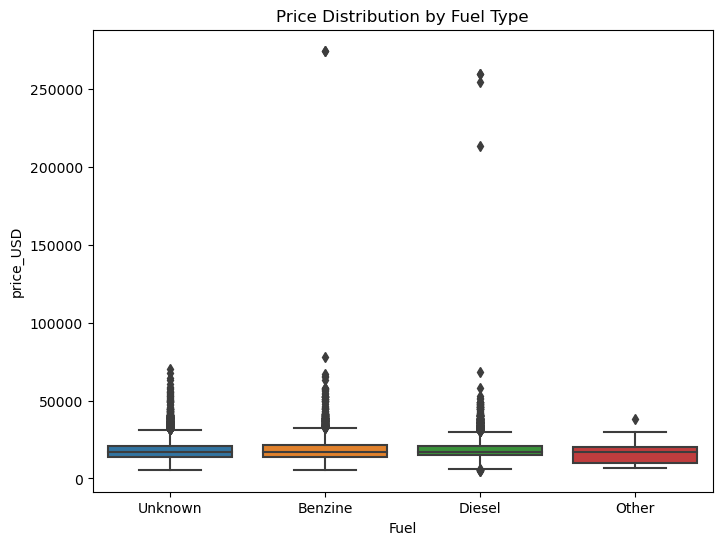

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x="Fuel", y="price_USD", data=df)
plt.title("Price Distribution by Fuel Type")
plt.show()

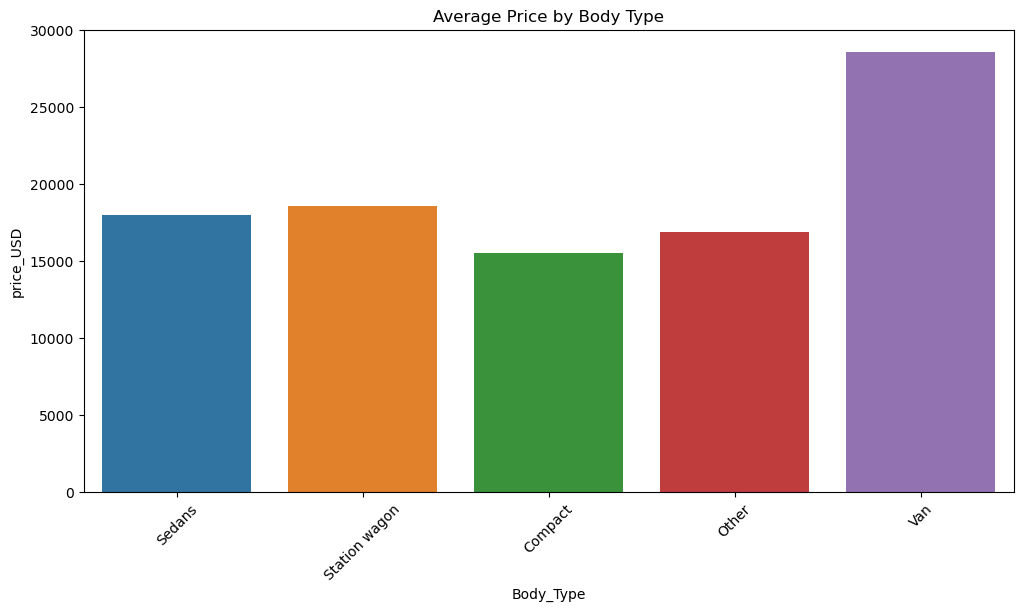

In [37]:
plt.figure(figsize=(12,6))
sns.barplot(x="Body_Type", y="price_USD", data=df, estimator="mean", errorbar=None)
plt.title("Average Price by Body Type")
plt.xticks(rotation=45)
plt.show()

In [38]:
df.to_csv("auto_price_cleaned.csv", index=False, encoding="utf-8-sig")